## Explore the gender-age-train dataset

In [34]:
# imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

### Getting data

In [2]:
genderage = pd.read_csv('gender_age_train.csv')

In [3]:
genderage.head(10)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
5,-1297074871525174196,F,24,F24-26
6,236877999787307864,M,36,M32-38
7,-8098239495777311881,M,38,M32-38
8,176515041953473526,M,33,M32-38
9,1596610250680140042,F,36,F33-42


In [4]:
genderage.shape

(74645, 4)

In [5]:
genderage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


**So there are no Null values.**

### Age

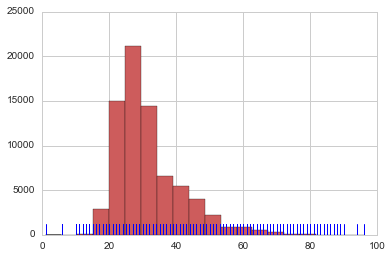

In [6]:
plt.hist(genderage.age, color = 'indianred', bins = 20)
sns.rugplot(genderage.age)

**The age distribution is skewed.**

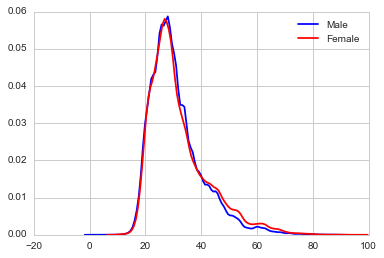

In [7]:
# age by gender
sns.kdeplot(genderage.age[genderage.gender == 'M'], color = 'blue', label = 'Male')
sns.kdeplot(genderage.age[genderage.gender == 'F'], color = 'red', label = 'Female')
plt.legend()

**The age distributions for males and females are very similar, except for a slight different between age 40 to 60.**

### Gender

In [8]:
print(genderage.gender.value_counts())

M    47904
F    26741
Name: gender, dtype: int64


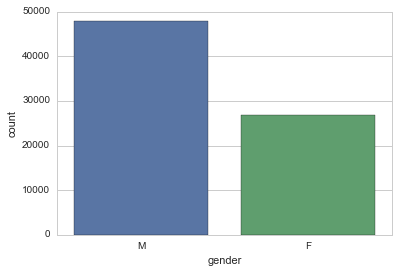

In [9]:
sns.countplot(genderage.gender)

**There are almost twice as many men as women in the dataset.**

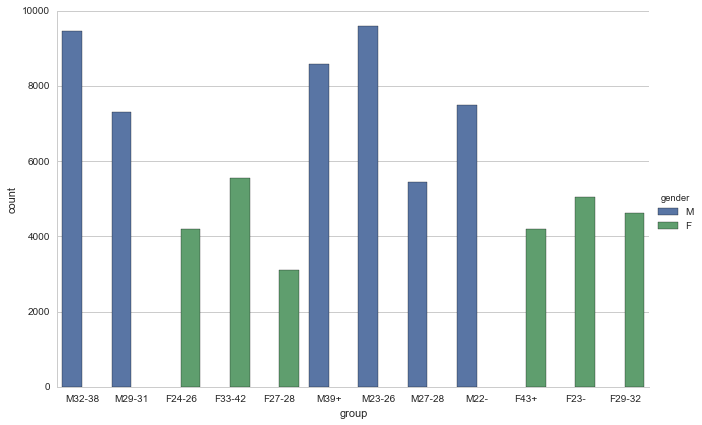

In [13]:
sns.factorplot('group', data = genderage, kind = 'count', hue = 'gender', size = 6.0, aspect = 1.5)

In [17]:
label = LabelEncoder()
y = label.fit_transform(genderage.group.values)

In [19]:
nclass = len(label.classes_)

In [21]:
pred = np.ones((genderage.shape[0],nclass))/nclass

In [32]:
print metrics.log_loss(y, pred)

2.48490664979


In [36]:
kf = KFold(genderage.shape[0], n_folds = 10, shuffle = False, random_state = 0)

In [37]:
kf

sklearn.cross_validation.KFold(n=74645, n_folds=10, shuffle=False, random_state=0)

In [40]:
pred = np.zeros((genderage.shape[0], nclass))

for i_train, i_test in kf:
    train = genderage.iloc[i_train, :]
    test = genderage.iloc[i_test, :]
    y_train, y_test = y[i_train], y[i_test]
    prob = train.groupby('group').size()/train.shape[0]
    pred[i_test,:] = prob.values
print metrics.log_loss(y, pred)

2.43145213282
